# Imported libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint, uniform

# Data preparation

In [2]:
#Retrieving dataset from CSV file
default_df = pd.read_csv('diabetes_binary.csv')

In [3]:
#Displaying dataset
default_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
#Checking size of dataset
default_df.shape

(253680, 22)

In [5]:
#prepared_df.drop_duplicates(inplace = True) '''Nothing to be done, persons can have same values and not be duplicates, no way to ID instances'''

In [6]:
#Checking for missing values & consistency in datatypes
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
# Checking distribtuion of values for all features
for col in default_df.columns:
    print(f"{col}: {np.sort(default_df[col].unique())}")

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 88. 89. 90. 91. 92. 95. 96. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13

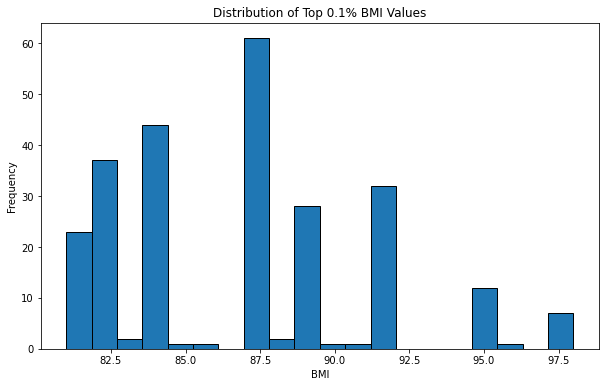

In [8]:
#Examining if BMI is true outlier or not
sorted_df = default_df.sort_values(by='BMI', ascending=False)

top_01_percent_index = int(len(sorted_df) * 0.001)

top_01_percent_bmi = sorted_df.head(top_01_percent_index)['BMI']

plt.figure(figsize=(10, 6))
plt.hist(top_01_percent_bmi, bins=20, edgecolor='black')
plt.title('Distribution of Top 0.1% BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Check for distribution of target variable
default_df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [10]:
default_df['Diabetes_binary'].value_counts().sum()

253680

## Balancing dataset

In [11]:
# Random undersampling, by separating the 0 (No Diabetes) and 1 (Diabetes)

is1 = default_df['Diabetes_binary'] == 1
data_1 = default_df[is1]

is0 = default_df['Diabetes_binary'] == 0
data_0 = default_df[is0]

n_samples = len(data_1)

data_0_sampled = data_0.sample(n=n_samples, random_state=42)

balanced_df = pd.concat([data_0_sampled, data_1], ignore_index=True)

balanced_df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [12]:
# Displaying new dataset
balanced_df['Diabetes_binary'].value_counts().sum()

70692

## Heatmap before and after balancing

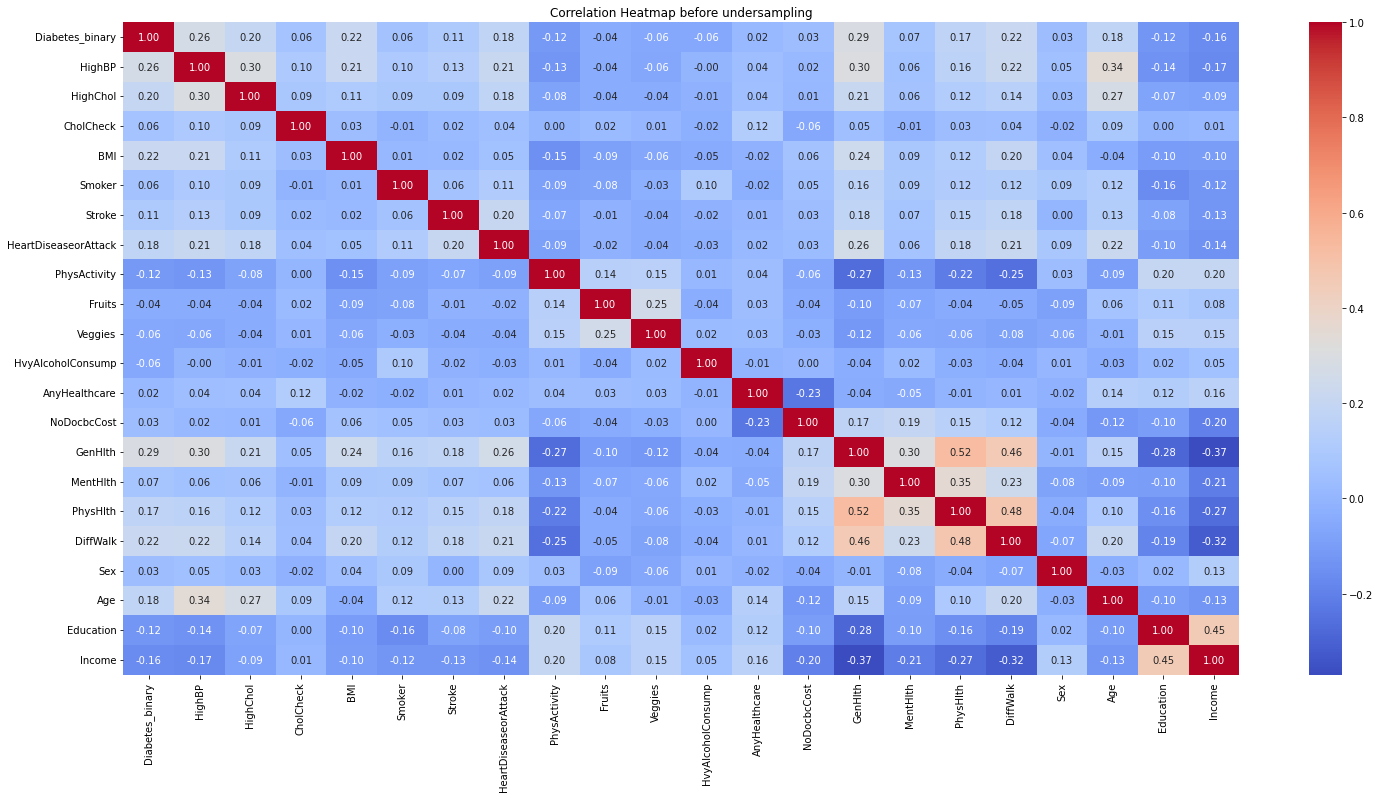

In [69]:
# Create a heatmap of correlations
plt.figure(figsize=(25, 12))
sns.heatmap(default_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap before undersampling")
plt.show()

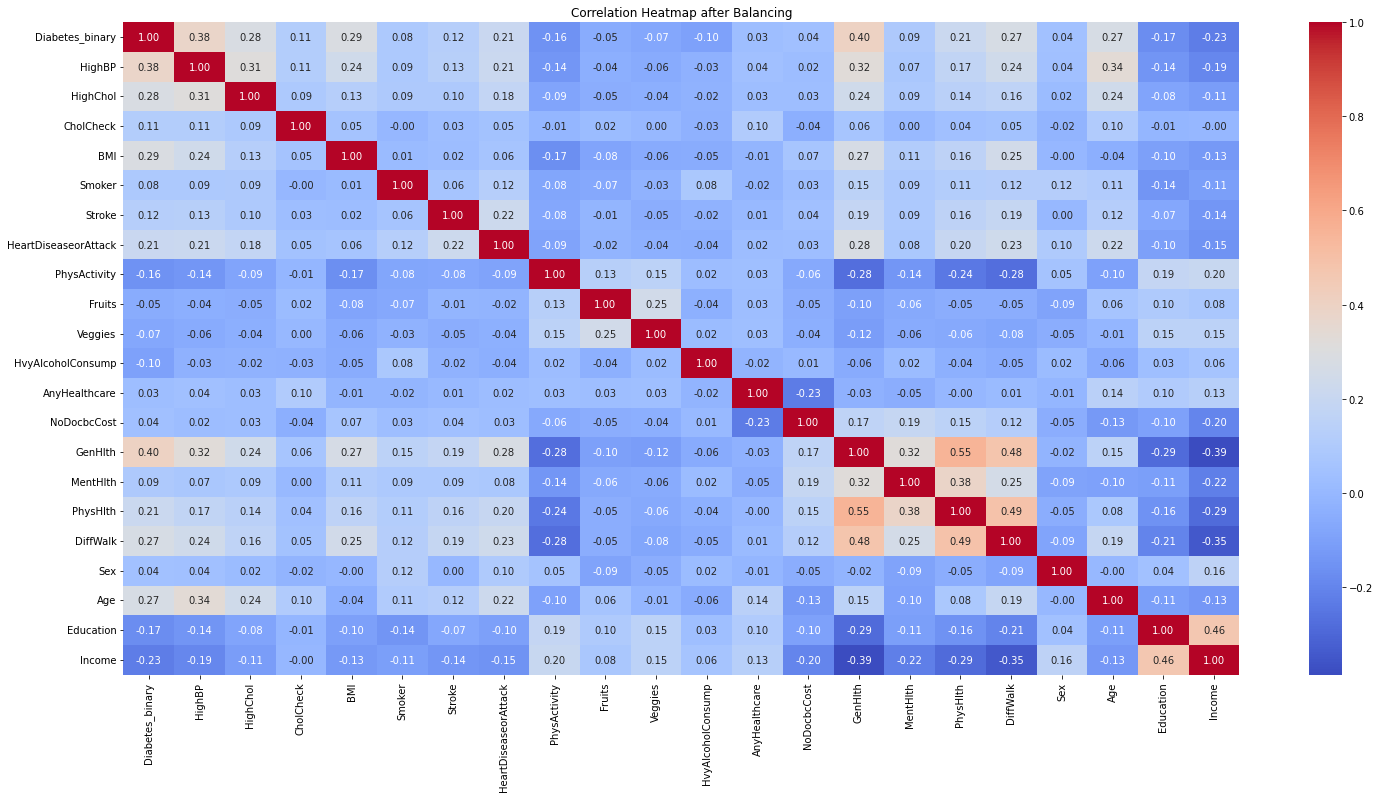

In [14]:
# Create a heatmap of correlations
plt.figure(figsize=(25, 12))
sns.heatmap(balanced_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap after Balancing")
plt.show()

# Modeling

## ZeroR Baseline 

In [40]:
# Calculating majority class and making predictions
majority_class = np.bincount(y).argmax()

zero_r_predictions = np.full(len(y), majority_class)

accuracy = accuracy_score(y, zero_r_predictions)

print(f"ZeroR Model Accuracy: {accuracy:.2f}")

ZeroR Model Accuracy: 0.86


In [45]:
# Same but for balanced dataset
target_variable = 'Diabetes_binary'

y_balanced = balanced_df[target_variable]

majority_class_balanced = np.bincount(y_balanced).argmax()

zero_r_predictions_balanced = np.full(len(y_balanced), majority_class_balanced)

accuracy_balanced = accuracy_score(y_balanced, zero_r_predictions_balanced)

print(f"ZeroR Model Accuracy on Balanced Dataset: {accuracy_balanced:.2f}")

ZeroR Model Accuracy on Balanced Dataset: 0.50


## Random Forest Classifier

### Default parameters

In [16]:
target_variable = 'Diabetes_binary'

# Extract features and target variable
X = default_df.drop(target_variable, axis=1)
y = default_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing RFC with default parameters
rf_classifier_default = RandomForestClassifier(random_state=42)

# Training
rf_classifier_default.fit(X_train, y_train)

# Making predictions
y_pred_default = rf_classifier_default.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
classification_rep_default = classification_report(y_test, y_pred_default)

print("Original Dataset with Default Hyperparameters:")
print("Accuracy: {:.2f}".format(accuracy_default))
print("Confusion Matrix:\n", conf_matrix_default)
print("Classification Report:\n", classification_rep_default)

Random Forest Classifier with Default Hyperparameters:
Accuracy: 0.86
Confusion Matrix:
 [[42416  1323]
 [ 5787  1210]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



### Optimized Hyperparameters

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'random_state': [42],
}

# Initializing RFC
rf_classifier = RandomForestClassifier()

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)

random_search.fit(X_train, y_train)

# Getting best hyperparameter settings
best_hyperparameters = random_search.best_params_

y_pred = random_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Original dataset with Optimal Hyperparameters:")
print("Best Hyperparameters: {}".format(best_hyperparameters))
print("Accuracy: {:.2f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Random Forest Classifier with Optimal Hyperparameters:
Best Hyperparameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 11, 'min_samples_split': 9, 'n_estimators': 198, 'random_state': 42}
Accuracy: 0.87
Confusion Matrix:
 [[43201   538]
 [ 6163   834]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     43739
         1.0       0.61      0.12      0.20      6997

    accuracy                           0.87     50736
   macro avg       0.74      0.55      0.56     50736
weighted avg       0.84      0.87      0.83     50736



### Undersampling and Default Parameters 

In [19]:
# Random undersampling
is1 = balanced_df[target_variable] == 1
data_5050_1 = balanced_df[is1]

is0 = balanced_df[target_variable] == 0
data_5050_0 = balanced_df[is0]

min_samples = min(len(data_5050_0), len(data_5050_1))

data_5050_0_rand = data_5050_0.sample(n=min_samples, random_state=42)

data_5050 = pd.concat([data_5050_0_rand, data_5050_1], ignore_index=True)

# Extract features and target variable
X = data_5050.drop(target_variable, axis=1)
y = data_5050[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing RFC with default parameters
rf_classifier_default = RandomForestClassifier(random_state=42)

rf_classifier_default.fit(X_train, y_train)

y_pred_default = rf_classifier_default.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
classification_rep_default = classification_report(y_test, y_pred_default)

print("Undersampling and Default Hyperparameters:")
print("Accuracy: {:.2f}".format(accuracy_default))
print("Confusion Matrix:\n", conf_matrix_default)
print("Classification Report:\n", classification_rep_default) 

Undersampling and Default Hyperparameters:
Accuracy: 0.73
Confusion Matrix:
 [[4897 2193]
 [1566 5483]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      7090
         1.0       0.71      0.78      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139



### Undersampling and Optimized Hyperparameters 

In [21]:
# Random undersampling
is1 = balanced_df['Diabetes_binary'] == 1
data_5050_1 = balanced_df[is1]

is0 = balanced_df['Diabetes_binary'] == 0
data_5050_0 = balanced_df[is0]

min_samples = min(len(data_5050_0), len(data_5050_1))

data_5050_0_rand = data_5050_0.sample(n=min_samples, random_state=42)

data_5050 = pd.concat([data_5050_0_rand, data_5050_1], ignore_index=True)

# Extract features and target variable
X = data_5050.drop(target_variable, axis=1)
y = data_5050[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining hyperparametermsprace for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'random_state': [42],
}

# Initializing RFC
rf_classifier = RandomForestClassifier()

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)

random_search.fit(X_train, y_train)

best_hyperparameters = random_search.best_params_

y_pred = random_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Undersampling and Optimal Hyperparameters:")
print("Best Hyperparameters: {}".format(best_hyperparameters))
print("Accuracy: {:.2f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Undersampling and Optimal Hyperparameters:
Best Hyperparameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 11, 'min_samples_split': 9, 'n_estimators': 198, 'random_state': 42}
Accuracy: 0.75
Confusion Matrix:
 [[4964 2126]
 [1417 5632]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



## Logistic Regression

### Default Parameters

In [53]:
target_variable = 'Diabetes_binary'

# Extract features and target variable
X = default_df.drop(target_variable, axis=1)
y = default_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing LR with default parameters
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000)

logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

print("Logistic Regression on Original Dataset with Default Hyperparameters:")
print("Accuracy: {:.2f}".format(accuracy_logreg))
print("Confusion Matrix:\n", conf_matrix_logreg)
print("Classification Report:\n", classification_rep_logreg)

Logistic Regression on Original Dataset with Default Hyperparameters:
Accuracy: 0.87
Confusion Matrix:
 [[42772   967]
 [ 5841  1156]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



### Optimized Hyperparameters

In [67]:
target_variable = 'Diabetes_binary'
X = default_df.drop(target_variable, axis=1)
y = default_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
param_distribution = {
    'C': uniform(0.01, 10),  
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  
    'max_iter': [1000]  
}

# Creating RandomizedSearchCV instance
logreg_random_search = RandomizedSearchCV(LogisticRegression(random_state=42), 
                                          param_distributions=param_distribution, 
                                          n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
logreg_random_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", logreg_random_search.best_params_)
print("Best Score:", logreg_random_search.best_score_)

# Evaluate the best model on the test set
best_logreg = logreg_random_search.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test)

accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
classification_rep_best_logreg = classification_report(y_test, y_pred_best_logreg)

print("\nOptimized Logistic Regression Classifier:")
print("Accuracy: {:.2f}".format(accuracy_best_logreg))
print("Confusion Matrix:\n", conf_matrix_best_logreg)
print("Classification Report:\n", classification_rep_best_logreg)

Best Hyperparameters: {'C': 6.021150117432088, 'max_iter': 1000, 'solver': 'liblinear'}
Best Score: 0.8629720514871556

Optimized Logistic Regression Classifier:
Accuracy: 0.87
Confusion Matrix:
 [[42772   967]
 [ 5841  1156]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



### Undersampling and Default Parameters

In [56]:
target_variable = 'Diabetes_binary'
X_balanced = balanced_df.drop(target_variable, axis=1)
y_balanced = balanced_df[target_variable]

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initializing LR with default parameters
logreg_classifier_balanced = LogisticRegression(random_state=42, max_iter=1000)

logreg_classifier_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_logreg_balanced = logreg_classifier_balanced.predict(X_test_balanced)

accuracy_logreg_balanced = accuracy_score(y_test_balanced, y_pred_logreg_balanced)
conf_matrix_logreg_balanced = confusion_matrix(y_test_balanced, y_pred_logreg_balanced)
classification_rep_logreg_balanced = classification_report(y_test_balanced, y_pred_logreg_balanced)

print("Logistic Regression on Balanced Dataset with Default Hyperparameters:")
print("Accuracy: {:.2f}".format(accuracy_logreg_balanced))
print("Confusion Matrix:\n", conf_matrix_logreg_balanced)
print("Classification Report:\n", classification_rep_logreg_balanced)

Logistic Regression on Balanced Dataset with Default Hyperparameters:
Accuracy: 0.75
Confusion Matrix:
 [[5174 1916]
 [1647 5402]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



### Undersampling and Optimized Hyperparameters

In [60]:
target_variable = 'Diabetes_binary'
X_balanced = balanced_df.drop(target_variable, axis=1)
y_balanced = balanced_df[target_variable]

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Defining the hyperparameter distribution
param_distribution = {
    'C': uniform(0.01, 10),  
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
    'max_iter': [1000]  

# Creating RandomizedSearchCV instance
logreg_random_search_balanced = RandomizedSearchCV(LogisticRegression(random_state=42), 
                                          param_distributions=param_distribution, 
                                          n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data of the balanced dataset
logreg_random_search_balanced.fit(X_train_balanced, y_train_balanced)

# Best hyperparameters and score
print("Best Hyperparameters (Balanced Dataset):", logreg_random_search_balanced.best_params_)
print("Best Score (Balanced Dataset):", logreg_random_search_balanced.best_score_)

# Evaluate the best model on the test set of the balanced dataset
best_logreg_balanced = logreg_random_search_balanced.best_estimator_
y_pred_best_logreg_balanced = best_logreg_balanced.predict(X_test_balanced)

accuracy_best_logreg_balanced = accuracy_score(y_test_balanced, y_pred_best_logreg_balanced)
conf_matrix_best_logreg_balanced = confusion_matrix(y_test_balanced, y_pred_best_logreg_balanced)
classification_rep_best_logreg_balanced = classification_report(y_test_balanced, y_pred_best_logreg_balanced)

print("\nOptimized Logistic Regression Classifier on Balanced Dataset:")
print("Accuracy: {:.2f}".format(accuracy_best_logreg_balanced))
print("Confusion Matrix:\n", conf_matrix_best_logreg_balanced)
print("Classification Report:\n", classification_rep_best_logreg_balanced)

Best Hyperparameters (Balanced Dataset): {'C': 0.21584494295802448, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Score (Balanced Dataset): 0.7436917576928979

Optimized Logistic Regression Classifier on Balanced Dataset:
Accuracy: 0.75
Confusion Matrix:
 [[5177 1913]
 [1650 5399]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



## K-nearest neighbors

### Default Parameters

In [22]:
# Extract features and target variable
X = default_df.drop(target_variable, axis=1)
y = default_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing KNN classifier with default parameters
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("KNN Classifier with Default Hyperparameters:")
print("Accuracy: {:.2f}".format(accuracy_knn))
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)

KNN Classifier with Default Hyperparameters:
Accuracy: 0.85
Confusion Matrix:
 [[41750  1989]
 [ 5615  1382]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     43739
         1.0       0.41      0.20      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



### Optimized Hyperparameters 

In [37]:
# Extract features and target variable
X = default_df.drop(target_variable, axis=1)
y = default_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree'] 
}


knc_random = RandomizedSearchCV(knn_classifier,param_distributions=param_dist, n_iter=5, cv=3,n_jobs=-1)

knc_random.fit(X_train, y_train)

print("Best Hyperparameters:", knc_random.best_params_)
print("Best Score:", knc_random.best_score_)

# Evaluate the best model on the test set
best_knn = knc_random.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

print("\nOptimized KNN Classifier:")
print("Accuracy: {:.2f}".format(accuracy_best_knn))
print("Confusion Matrix:\n", conf_matrix_best_knn)
print("Classification Report:\n", classification_rep_best_knn)

Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 7, 'algorithm': 'auto'}
Best Score: 0.8520823478397981

Optimized KNN Classifier:
Accuracy: 0.85
Confusion Matrix:
 [[42120  1619]
 [ 5774  1223]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43739
         1.0       0.43      0.17      0.25      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.57      0.58     50736
weighted avg       0.82      0.85      0.83     50736



### Undersampling and Default Parameters 

In [24]:
# Random undersampling
is1 = balanced_df[target_variable] == 1
data_5050_1 = balanced_df[is1]

is0 = balanced_df[target_variable] == 0
data_5050_0 = balanced_df[is0]

min_samples = min(len(data_5050_0), len(data_5050_1))

data_5050_0_rand = data_5050_0.sample(n=min_samples, random_state=42)

data_5050 = pd.concat([data_5050_0_rand, data_5050_1], ignore_index=True)

# Extract features and target variable
X = data_5050.drop(target_variable, axis=1)
y = data_5050[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing KNN classifier with default parameters
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("KNN Classifier with Default Hyperparameters:")
print("Accuracy: {:.2f}".format(accuracy_knn))
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)

KNN Classifier with Default Hyperparameters:
Accuracy: 0.70
Confusion Matrix:
 [[4797 2293]
 [1907 5142]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      7090
         1.0       0.69      0.73      0.71      7049

    accuracy                           0.70     14139
   macro avg       0.70      0.70      0.70     14139
weighted avg       0.70      0.70      0.70     14139



### Undersampling and Optimized Hyperparameters 

In [35]:
# Random undersampling
is1 = balanced_df[target_variable] == 1
data_5050_1 = balanced_df[is1]

is0 = balanced_df[target_variable] == 0
data_5050_0 = balanced_df[is0]

min_samples = min(len(data_5050_0), len(data_5050_1))

data_5050_0_rand = data_5050_0.sample(n=min_samples, random_state=42)

data_5050 = pd.concat([data_5050_0_rand, data_5050_1], ignore_index=True)

# Extract features and target variable
X = data_5050.drop(target_variable, axis=1)
y = data_5050[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree']  
}

knc_random = RandomizedSearchCV(knn_classifier,param_distributions=param_dist, n_iter=10, cv=5,n_jobs=-1)

knc_random.fit(X_train, y_train)

print("Best Hyperparameters:", knc_random.best_params_)
print("Best Score:", knc_random.best_score_)

best_knn = knc_random.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

print("\nOptimized KNN Classifier:")
print("Accuracy: {:.2f}".format(accuracy_best_knn))
print("Confusion Matrix:\n", conf_matrix_best_knn)
print("Classification Report:\n", classification_rep_best_knn)

Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 9, 'algorithm': 'ball_tree'}
Best Score: 0.7134192726953512

Optimized KNN Classifier:
Accuracy: 0.72
Confusion Matrix:
 [[4850 2240]
 [1770 5279]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.68      0.71      7090
         1.0       0.70      0.75      0.72      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139

